In [41]:
from auto_classify import ImgFace
import pickle
import cv2
import matplotlib.pyplot as plt
import random
import os

# show 12 image with same class

In [42]:
def show_all_image_with_same_class(key: str):
    data: dict[str, list[ImgFace]] = pickle.load(open("out/encoding-dict.pkl", "rb"))
    current_class = data[key]

    plt.figure(figsize=(10,10))  # specifying the overall grid size

    for i, face_data in enumerate(current_class[:12]):
        img = plt.imread(face_data.img_path)
        top, right, bottom, left = face_data.face_location

        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(img, f"class_{key}", (left, top - 6), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

        plt.subplot(4, 4, i + 1)  # the number of images in the grid is 5*5 (25)
        plt.axis("off")
        plt.imshow(img)
        # plt.figure(figsize=(2,2))
        # plt.imshow(img)

    plt.axis("off")
    plt.show()

def show_croped_image_with_same_class(key: str):
    for image_name in os.listdir(f"out/{key}"):
        image_path = f"out/{key}/{image_name}"
        plt.figure(figsize=(2,2))
        plt.axis("off")
        img = plt.imread(image_path)
        plt.imshow(img)

In [43]:
frequent_face_classes: dict[str, list[str]] = {}
with open("out/results/frequent-face-classes.pkl", "rb") as f:
    frequent_face_classes = pickle.load(f)
frequent_face_classes.items()

dict_items([('0', ['all-unknown/donald-trump-2-53.jpg', 'all-unknown/donald-trump-1-16.jpg', 'all-unknown/bill-gates-1-10.jpg', 'all-unknown/bill-gates-1-38.jpg', 'all-unknown/bill-gates-2-41.jpg', 'all-unknown/bill-gates-2-55.jpg', 'all-unknown/bill-gates-1-39.jpg', 'all-unknown/bill-gates-1-11.jpg', 'all-unknown/bill-gates-1-8.jpg', 'all-unknown/bill-gates-1-13.jpg', 'all-unknown/bill-gates-2-56.jpg', 'all-unknown/bill-gates-2-42.jpg', 'all-unknown/bill-gates-2-43.jpg', 'all-unknown/bill-gates-2-57.jpg', 'all-unknown/bill-gates-1-12.jpg', 'all-unknown/bill-gates-1-29.jpg', 'all-unknown/bill-gates-2-50.jpg', 'all-unknown/bill-gates-1-28.jpg', 'all-unknown/bill-gates-2-36.jpg', 'all-unknown/bill-gates-2-37.jpg', 'all-unknown/bill-gates-2-19.jpg', 'all-unknown/bill-gates-2-25.jpg', 'all-unknown/bill-gates-2-31.jpg', 'all-unknown/bill-gates-2-27.jpg', 'all-unknown/bill-gates-2-33.jpg', 'all-unknown/bill-gates-2-32.jpg', 'all-unknown/bill-gates-2-26.jpg', 'all-unknown/bill-gates-1-47.jpg'

Class_key: 1
number of faces: 117
Sample croped image:


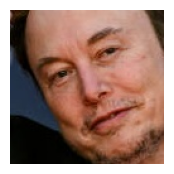

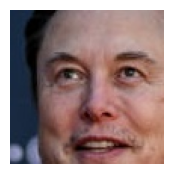

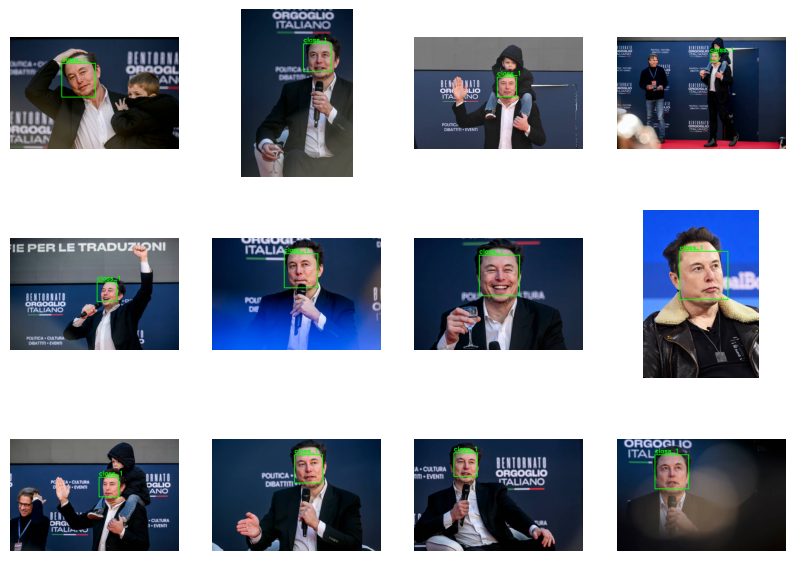

Class_key: 12
number of faces: 74
Sample croped image:


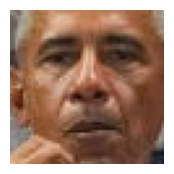

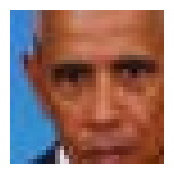

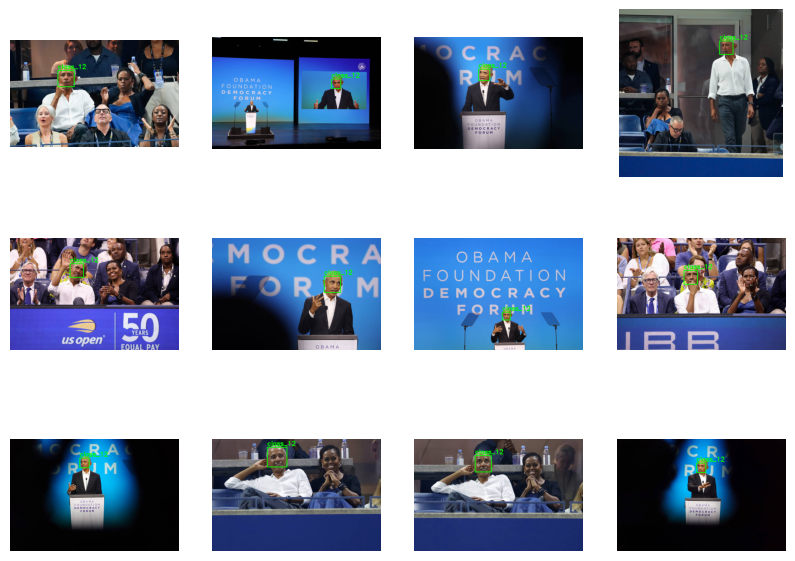

In [44]:
# sort by number of faces
sorted_frequent_face_classes = sorted(frequent_face_classes.items(), key=lambda x: len(x[1]), reverse=True)
for key, value in sorted_frequent_face_classes[:2]:
    print(f"Class_key: {key}")
    print(f"number of faces: {len(value)}")
    print("Sample croped image:")
    show_croped_image_with_same_class(key)
    show_all_image_with_same_class(key)

In [45]:
def plot_12_images(image_path_list: list[str]):
    random.seed(42)
    plt.figure(figsize=(8,8))  # specifying the overall grid size

    for i, img_path in enumerate(random.sample(image_path_list, min(len(image_path_list), 12))):
        img = plt.imread(img_path)
        plt.subplot(4, 4, i + 1)  # the number of images in the grid is 5*5 (25)
        plt.axis("off")
        plt.imshow(img)

    plt.axis("off")
    plt.show()

# Show Images that no any face detected

No Face Detected: 8


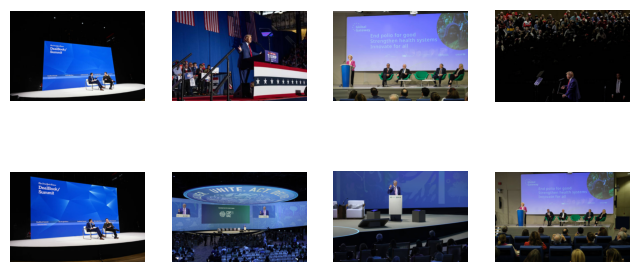

In [46]:
no_face_imgs:list[str] = []
with open('out/results/no-face.pkl', "rb") as f:
    no_face_imgs = pickle.load(f)
print(f"No Face Detected: {len(no_face_imgs)}")
plot_12_images(no_face_imgs)

# Single Face

Single Face: 240


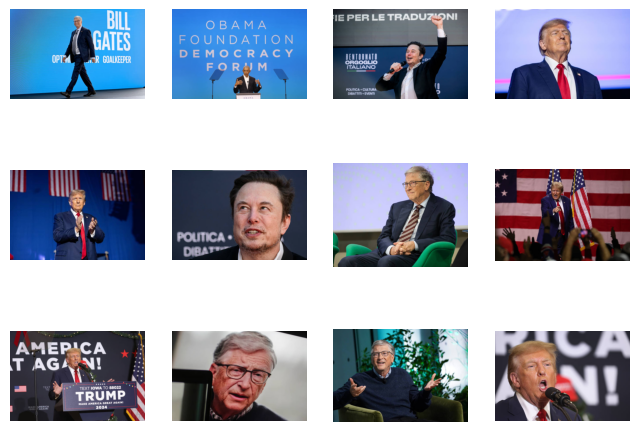

In [47]:
single_face_imgs:list[str] = []
with open('out/results/single-face.pkl', "rb") as f:
    single_face_imgs = pickle.load(f)
print(f"Single Face: {len(single_face_imgs)}")
plot_12_images(single_face_imgs)

# Multi Face

Multi Face: 201


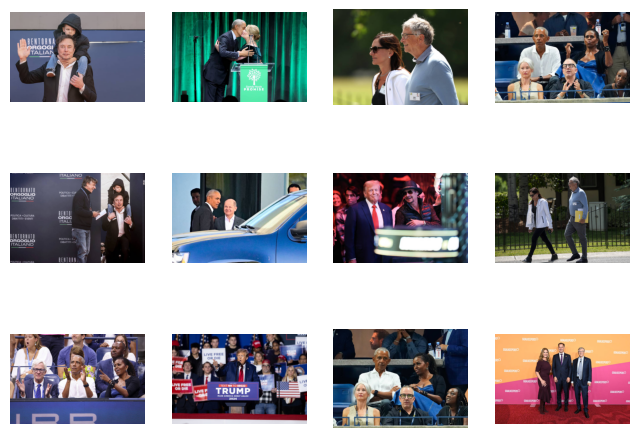

In [48]:
multi_face_imgs:list[str] = []
with open('out/results/multi-face.pkl', "rb") as f:
    multi_face_imgs = pickle.load(f)
print(f"Multi Face: {len(multi_face_imgs)}")
plot_12_images(multi_face_imgs)

In [49]:
def show_emotion_images(emotion_name: str):
    random.seed(42)
    data: dict[str, list[str]] = pickle.load(open("out/results/emotions-dict.pkl", "rb"))

    print(f"Emotion: {emotion_name}")
    print(f"Count: {len(data[emotion_name])}")
    plt.figure(figsize=(10,10))  # specifying the overall grid size

    for i, image_path in enumerate(random.sample(data[emotion_name], min(len(data[emotion_name]), 12))):
        img = plt.imread(image_path)

        plt.subplot(4, 4, i + 1)  # the number of images in the grid is 5*5 (25)
        plt.axis("off")
        plt.imshow(img)
        # plt.figure(figsize=(2,2))
        # plt.imshow(img)

    plt.axis("off")
    plt.show()

Emotion: happy
Count: 90


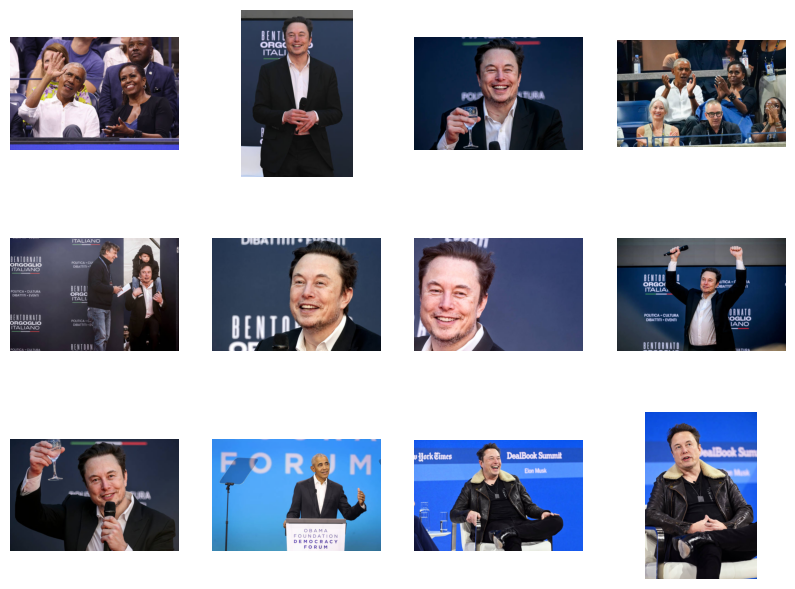

In [50]:
show_emotion_images("happy")

Emotion: angry
Count: 34


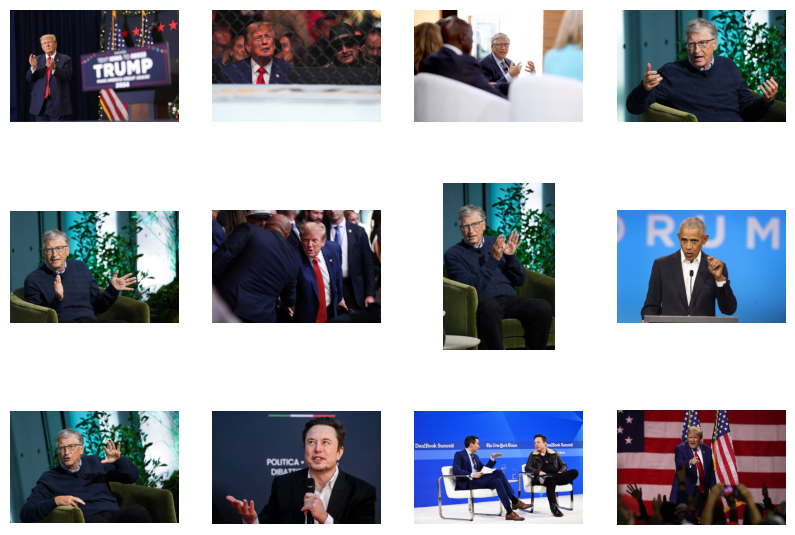

In [51]:
show_emotion_images("angry")

Emotion: surprise
Count: 4


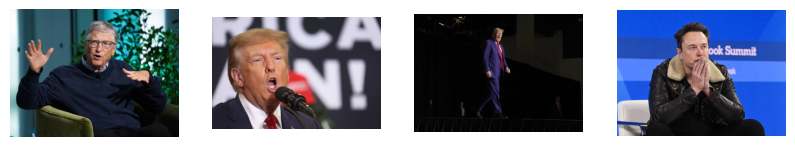

In [52]:
show_emotion_images("surprise")

In [56]:
with open('out/results/multi-face.pkl', "rb") as f:
    multi_face_imgs = pickle.load(f)
    print(f"Num of Multi Face: {len(multi_face_imgs)}")
    print(multi_face_imgs)

Num of Multi Face: 201
['all-unknown/elon-musk-1-4.jpg', 'all-unknown/obama-2-47.jpg', 'all-unknown/bill-gates-1-10.jpg', 'all-unknown/obama-2-53.jpg', 'all-unknown/obama-2-9.jpg', 'all-unknown/bill-gates-2-41.jpg', 'all-unknown/bill-gates-2-55.jpg', 'all-unknown/elon-musk-1-33.jpg', 'all-unknown/elon-musk-1-32.jpg', 'all-unknown/bill-gates-2-40.jpg', 'all-unknown/obama-2-8.jpg', 'all-unknown/bill-gates-1-11.jpg', 'all-unknown/obama-2-46.jpg', 'all-unknown/donald-trump-2-52.jpg', 'all-unknown/donald-trump-2-50.jpg', 'all-unknown/obama-2-44.jpg', 'all-unknown/obama-1-29.jpg', 'all-unknown/bill-gates-2-56.jpg', 'all-unknown/bill-gates-2-42.jpg', 'all-unknown/elon-musk-1-18.jpg', 'all-unknown/bill-gates-2-57.jpg', 'all-unknown/obama-1-28.jpg', 'all-unknown/bill-gates-1-12.jpg', 'all-unknown/obama-2-45.jpg', 'all-unknown/donald-trump-1-28.jpg', 'all-unknown/donald-trump-2-51.jpg', 'all-unknown/donald-trump-2-45.jpg', 'all-unknown/donald-trump-2-41.jpg', 'all-unknown/obama-2-55.jpg', 'all-u